This is mainly EDA a work.Try to find out different information and visualize them.

The work will done by asking different question.

In [10]:
# importing the necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('65 Years of Weather Data Bangladesh (1948 - 2013).csv')

In [6]:
df.head()

,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [7]:
df.isnull().sum()

Station Names        0
YEAR                 0
Month                0
Max Temp             0
Min Temp             0
Rainfall             0
Relative Humidity    0
Wind Speed           0
Cloud Coverage       0
Bright Sunshine      0
Station Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
dtype: int64

## EDA 

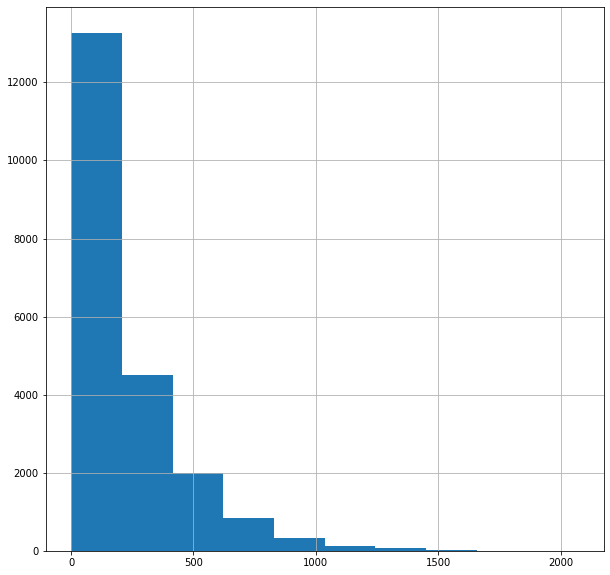

In [8]:
plt.figure(figsize = (10 , 10))
df.Rainfall.hist()

### Which year have highest Rainfall.

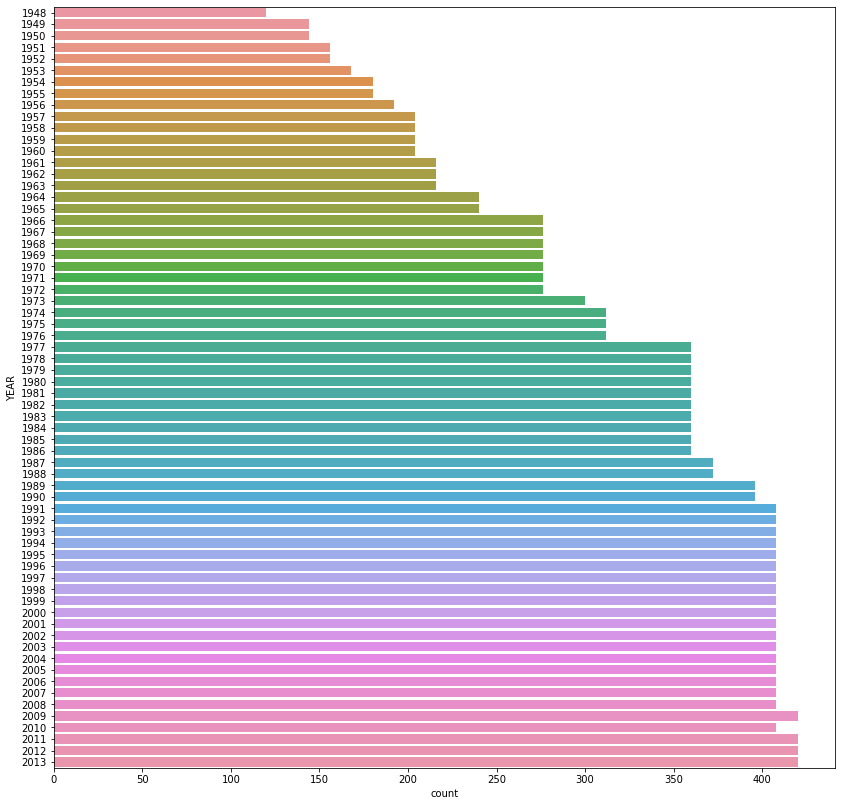

In [14]:
plt.figure(figsize = (14 , 14))
sns.countplot(y = 'YEAR' , data = df)

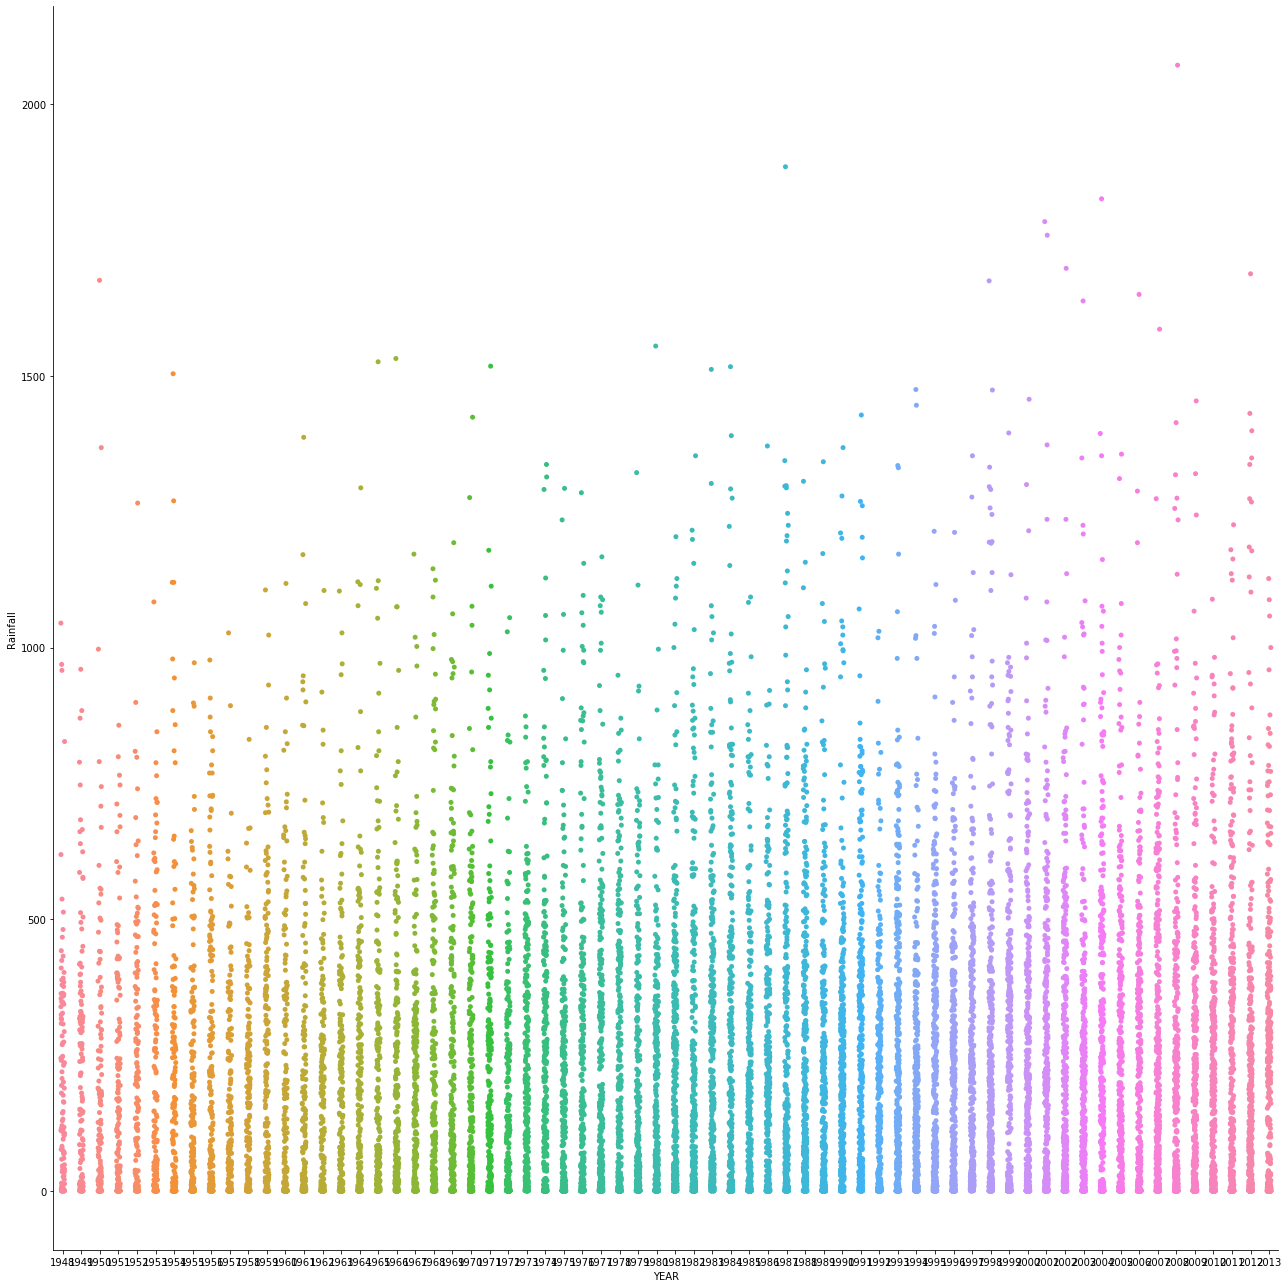

In [23]:
sns.catplot(x = "YEAR" , y = "Rainfall" , data = df  , height = 18)